In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
raw_data = pd.read_csv("AMI_GSE66360_series_matrix.csv", encoding='ISO-8859-1')

C:\Users\itani\AppData\Local\Temp\ipykernel_18356\3805649576.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv("AMI_GSE66360_series_matrix.csv", encoding='ISO-8859-1')


In [102]:
raw_data.shape

(54735, 100)

In [103]:
metadata = raw_data.iloc[:60, :]
data = raw_data.iloc[58:, :]
data = data.transpose()
data.columns = data.iloc[0]  # Assign first row to column names
data = data[1:]

data.head()

"!Series_title ""A Whole Blood Molecular Signature for the Identification of Acute Myocardial Infarction Without Relying Upon Myonecrosis (microarray)""",Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
Unnamed: 1,H,GSM1620819,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,...,13.257325,13.266235,14.57123,14.276568,4.504659,3.139334,2.747015,2.651554,3.413429,3.140612
Unnamed: 2,H,GSM1620820,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,...,13.59386,13.517013,14.738834,14.341233,4.409226,3.039961,2.638606,2.643615,3.399063,3.132691
Unnamed: 3,H,GSM1620821,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,...,13.372759,13.416583,14.627181,14.318568,4.310076,3.220109,2.495261,2.626028,3.53997,3.698396
Unnamed: 4,H,GSM1620822,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,...,13.490226,13.494827,14.754124,14.363297,4.439311,3.263782,2.544199,2.504958,3.396225,3.638612
Unnamed: 5,H,GSM1620823,5.017832878,7.831450258,6.793079158,5.911542321,2.723686912,9.582343511,7.283872601,5.219483996,...,13.236785,13.330192,14.548389,14.263677,4.562883,3.138524,2.50663,2.609707,3.43472,3.577649


A) 1) How many genes profiled?


In [104]:
genes_num = data.iloc[:,2:].shape[1]
print(f'the num of genes is {genes_num}')

the num of genes is 54675


2) How many samples (subjects/patients) in total?


In [105]:
samples_num = data.shape[0]
print(f'the num of samples is {samples_num}')

the num of samples is 99


3) How many samples in each class?


In [106]:
samp_H = data[data['Class'] == 'H'].shape[0]
samp_M = data[data["Class"] == 'M'].shape[0]
print(f'in Myocardial Infraction there are {samp_M}, while in Healthy group there are {samp_H}')

in Myocardial Infraction there are 49, while in Healthy group there are 50


4) If there are missing values, then remove the entire row
(gene) from the data matrix.
How many rows left now?


In [107]:
data.dropna(inplace=True, axis =1 )
genes_num = data.iloc[:,2:].shape[1]
print(f'the num of genes is after cleaning is {genes_num}')

the num of genes is after cleaning is 54628


5) Pick 20 genes at random. Draw histograms comparing
expression levels of each of these genes in the two
classes M and H.

In [108]:
import random
import matplotlib.pyplot as plt

data.iloc[:, 2:] = data.iloc[:, 2:].astype(float)
np.random.seed(1)
random_integers = random.sample(range(2, data.shape[1]), 20)
df_m = data[data['Class'] == 'M']  # Samples with class 'M'
df_h = data[data['Class'] == 'H']  # Samples with class 'H'
data_for_hist_20_M = df_m.iloc[:,random_integers]
data_for_hist_20_H = df_h.iloc[:,random_integers]


data_for_hist_20_H = data_for_hist_20_H.astype(float).round(3)


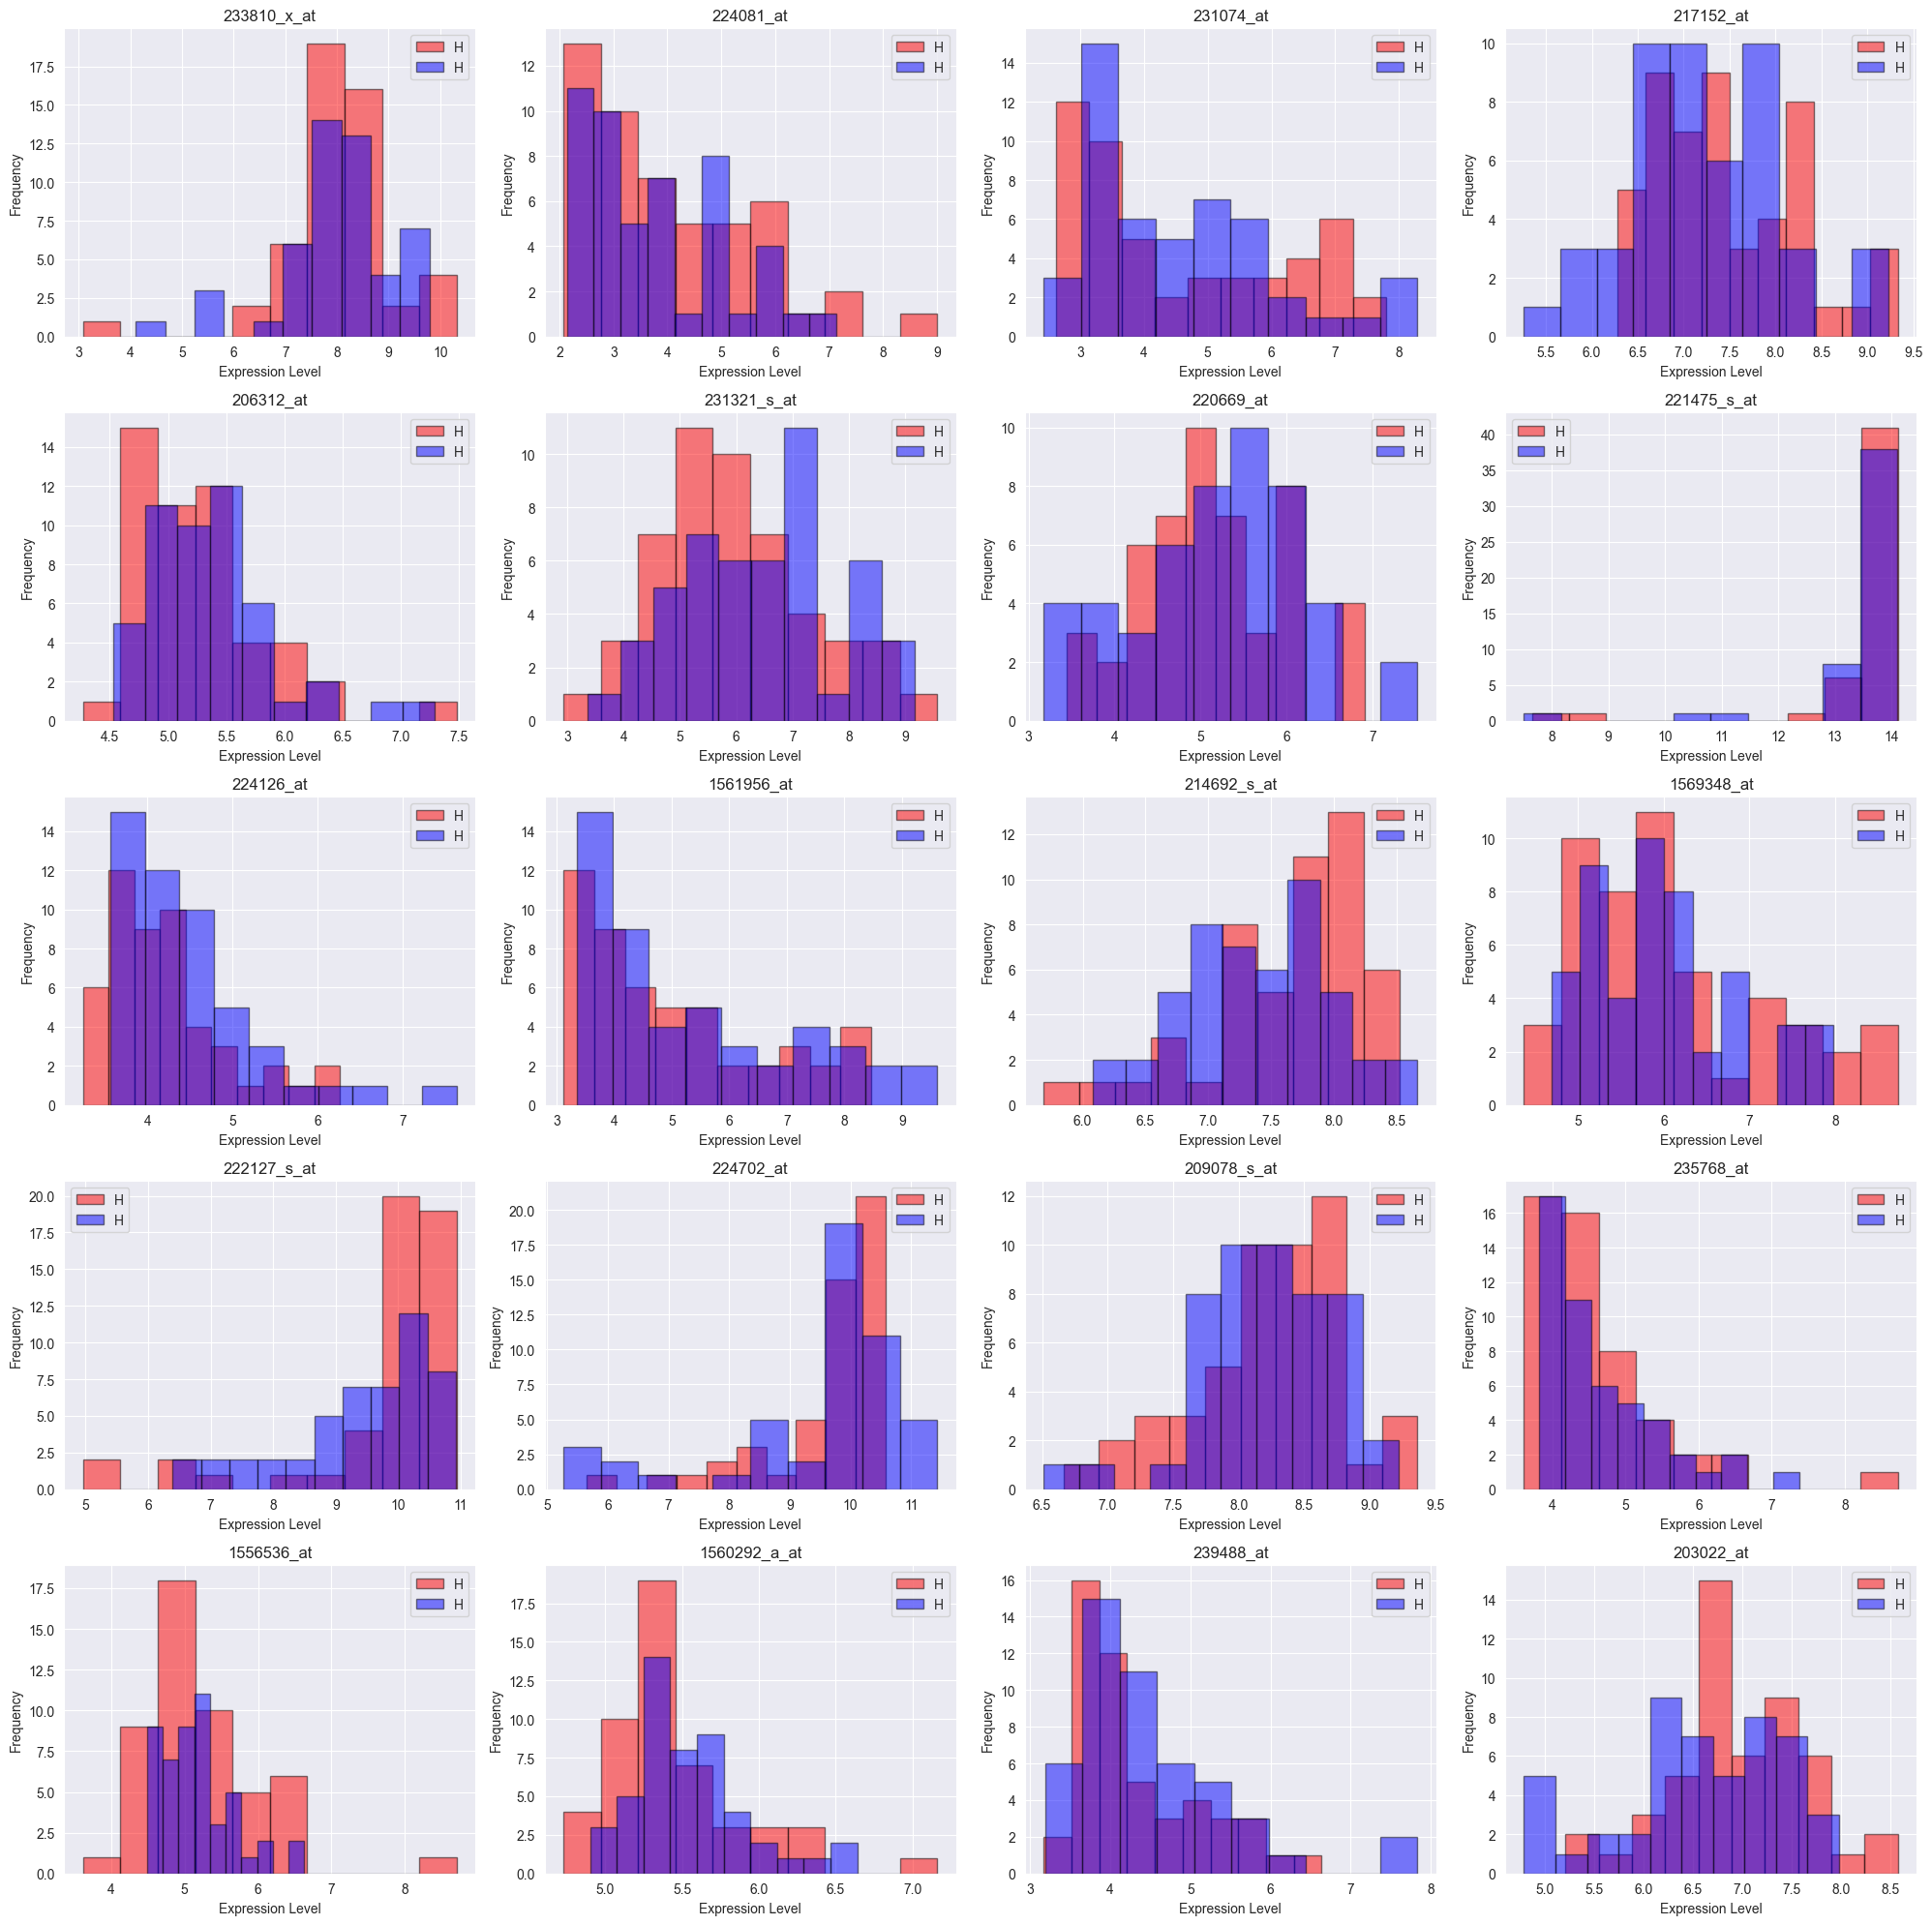

In [109]:
import matplotlib.pyplot as plt



# Plotting the histograms

plt.figure(figsize=(20, 20))
for i in range(20):
    column_name = data_for_hist_20_M.columns[i]

    plt.subplot(5, 4, i + 1)
    plt.hist(data_for_hist_20_H[column_name], alpha=0.5, label='H', bins=10, color='red', edgecolor='black')
    plt.hist(data_for_hist_20_M[column_name], alpha=0.5, label='H', bins=10, color='blue', edgecolor='black')
    plt.title(column_name)
    plt.xlabel('Expression Level')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


b. WRS for differential expression (DE)
1) Consider some gene, g. Under the null model (which assumes that
for g there is no M vs H DE), what is the expected sum of ranks of
g’s expression levels measured for samples labeled M?


In [110]:
num_of_M = data[data['Class']=='M'].shape[0]
num_of_H = data[data['Class']=='H'].shape[0]

#Using the formula as shown in class : B*(N+1)/2
expected_rank_sum_M = int((num_of_M * (num_of_M + num_of_H + 1)) / 2)
print(f'the expected rank sum of M is {expected_rank_sum_M}')

the expected rank sum of M is 2450


2) Denote this sum of ranks by RS(g). What is the minimal value, m,
that RS(g) can take?


In [111]:
min_rank_sum = int((num_of_M * (num_of_M + 1)) / 2)

print(f"Minimal sum of ranks (m) for M: {min_rank_sum}")

Minimal sum of ranks (m) for M: 1225


3) Under the null model, what is the probability of RS(g) = m?
(provide a formula for this and explain it)


In [112]:
from math import comb
N = num_of_H+num_of_M
p_min_rank_sum = 1 / comb(N, num_of_M)

# the formula is the probability under uniform descrete distribution, the size of the set is choose(N,M)
# since that is number of ways to select n_M ranks from N
# RS(g) = m occurs when all M samples have the lowest possible ranks (1, 2, ..., n_M)

print(f"Probability of RS(g) = min_rank_sum ({min_rank_sum}) is {p_min_rank_sum:}")


Probability of RS(g) = min_rank_sum (1225) is 1.9823306042836678e-29


4) Under the null model, what is the probability of RS(g) = m+1? what
is the probability of RS(g) = m+2?
(provide formulas and explain them)



Compute probability of RS(g) = m+1

<span style="color:blue;">
Since the is only one permutation to give as RS(g) = m+1, which is the when the last ranked element in M is ranked ar m+1 (for example if there are 10 elements in M then it has the rankings from 1 to 9 and also the 11 rank (while the 10th rank is from the other set N\M)
</span>



In [113]:

p_m1 = 1/comb(N, num_of_M)
print(f"P(RS(g) = m+1): {p_m1:}  # Probability of getting one rank unit higher than min")

P(RS(g) = m+1): 1.9823306042836678e-29  # Probability of getting one rank unit higher than min


# Compute probability of RS(g) = m+2
<span style="color:blue;">
Here there are 2 possible permutations, as if we ranked the last renked elementof M as the m+2 elelmnt, pr we rank one of the not(m) element at m-1th rank, then m includes the mth ranked and the (m+1)th ranked element
</span>

In [114]:

p_m2 = 2 / comb(N, num_of_M)
print(f"P(RS(g) = m+2): {p_m2:}  # Probability of getting two rank units higher than min")


P(RS(g) = m+2): 3.9646612085673355e-29  # Probability of getting two rank units higher than min


Draw a histogram of the values of RS(g) in the dataset. Here g
ranges over all genes in the data (after the clean-up)


Text(0, 0.5, 'RS(M)')

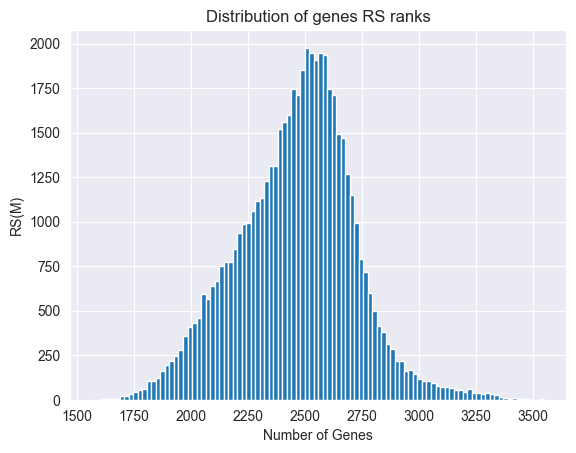

In [115]:
ranks = []
M_indices = data['Class'] == 'M'
for gene in data.iloc[:,2:].columns:
    gene_data = data[gene]
    gene_rank = gene_data.rank()
    M_rank = sum(gene_rank[M_indices])
    ranks.append(M_rank)

plt.hist(ranks, 100)
plt.title("Distribution of genes RS ranks")
plt.xlabel("Number of Genes")
plt.ylabel("RS(M)")





c. Differential Expression
The purpose is to determine the statistical significance of
differential expression (DE) observed for each gene in H vs M.
Evaluate the DE in both one-sided directions for every gene,
using both Student t-test and WRS test. Report the number of genes overexpressed in M vs H at a p-value
better (≤) than 0.05 and separately genes underexpressed in M
vs H at a p-value of 0.05. For both directions use both a Student t-
test and a WRS test.


In [116]:
from scipy import stats
data_M = data[data['Class'] == 'M'].iloc[:,2:]
data_H = data[data['Class'] == 'H'].iloc[:,2:]

gene_pvals = {'gene': [], 'p_val_t_test_m_greater_h': [],'p_val_t_test_h_greater_m': [], 'p_value_wrs_M_g_H':[], 'p_value_wrs_H_g_M':[]}
for gene in data_H.columns:
    M_values = pd.to_numeric(data_M.loc[:,gene])
    H_values = pd.to_numeric(data_H.loc[:,gene])
    
    _, p_value_ttest_M_g_H = stats.ttest_ind(M_values, H_values, alternative='greater')  # one-sided t-test (M > H)
    _, p_value_ttest_H_g_M = stats.ttest_ind(M_values, H_values, alternative='less')  # one-sided t-test (M < H)
    _, p_value_wrs_M_g_H = stats.ranksums(M_values, H_values,alternative='greater') # one-sided wrs (M > H)
    _, p_value_wrs_H_g_M = stats.ranksums(M_values, H_values,alternative='less') # one-sided wrs (M < H)

    gene_pvals['gene'].append(gene)
    gene_pvals['p_val_t_test_m_greater_h'].append(p_value_ttest_M_g_H)
    gene_pvals['p_val_t_test_h_greater_m'].append(p_value_ttest_H_g_M)
    gene_pvals['p_value_wrs_M_g_H'].append(p_value_wrs_M_g_H)
    gene_pvals['p_value_wrs_H_g_M'].append(p_value_wrs_H_g_M)


In [117]:

gene_pvals_table = pd.DataFrame(gene_pvals)

genes_underexpressed_t_test = sum(gene_pvals_table['p_val_t_test_h_greater_m'] <= 0.05)
genes_overexpressed_t_test = sum(gene_pvals_table['p_val_t_test_m_greater_h'] <= 0.05)

genes_underexpressed_WRS = sum(gene_pvals_table['p_value_wrs_H_g_M'] <= 0.05)
genes_overexpressed_WRS = sum(gene_pvals_table['p_value_wrs_M_g_H'] <= 0.05)

print(f"Number of Under Expressed Genes by T-test: {genes_underexpressed_t_test}")
print(f"Number of Over expressed Genes by T-test: {genes_overexpressed_t_test}")

print(f"Number of Under Expressed Genes by WRS: {genes_underexpressed_WRS}")
print(f"Number of Over Expressed Genes by WRS: {genes_overexpressed_WRS}")

Number of Under Expressed Genes by T-test: 7467
Number of Over expressed Genes by T-test: 7067
Number of Under Expressed Genes by WRS: 9476
Number of Over Expressed Genes by WRS: 9019



d. Correlations
Select the 60 most significant genes from each one of the one-
sided WRS DE lists you computed in 3c. Generate a set of 120
genes, D, which is the union of the above two sets.
1) Compute Spearman rho correlations in all pairs within D (120
choose 2 numbers). Represent the correlation matrix as a 120x120
heatmap.


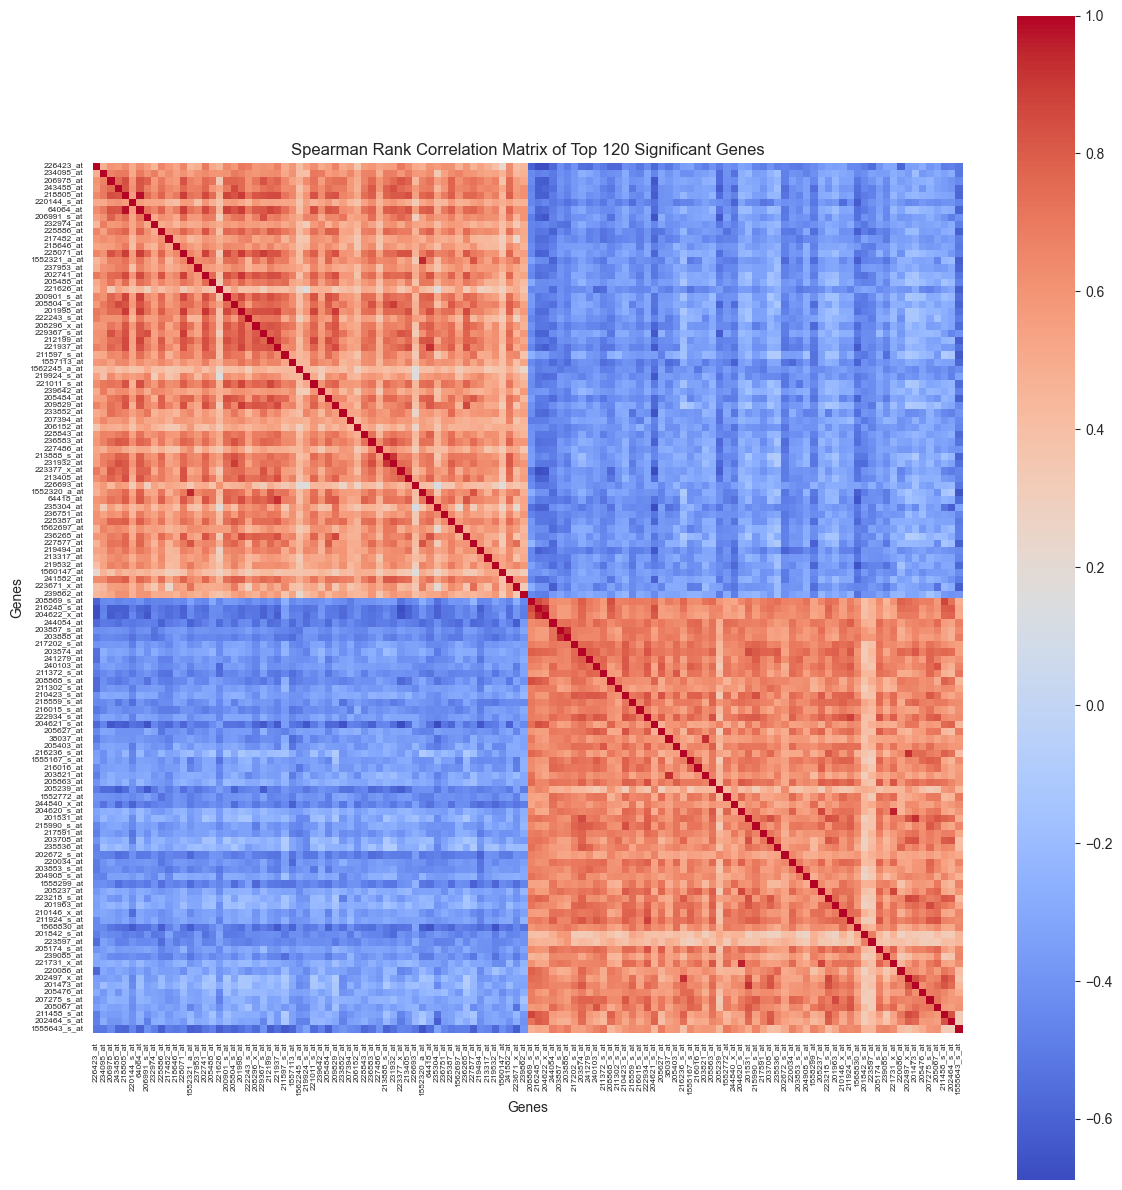

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

genes_underexpressed_top_60 = gene_pvals_table.sort_values('p_value_wrs_H_g_M',ascending=True).iloc[:60,0]
genes_overexpressed_top_60 = gene_pvals_table.sort_values('p_value_wrs_M_g_H', ascending=True).iloc[:60,0]
D = pd.concat([genes_underexpressed_top_60, genes_overexpressed_top_60], ignore_index=True)
gene_pvals_table.sort_values('p_value_wrs_M_g_H', ascending=True)


# Generate the Spearman correlation matrix
D_gene_values = data.loc[:, D].astype(float)
spearman_corr_matrix, _ = spearmanr(D_gene_values, axis=0)
spearman_corr_matrix.shape

# Create the heatmap
plt.figure(figsize=(12, 12))  # You can adjust the size for better readability
sns.heatmap(spearman_corr_matrix, annot=False, cmap='coolwarm', cbar=True, square=True,
            xticklabels=D_gene_values.columns, yticklabels=D_gene_values.columns)

# Title and labels
plt.title("Spearman Rank Correlation Matrix of Top 120 Significant Genes")
plt.xlabel("Genes")
plt.ylabel("Genes")

# Adjust tick size and rotation
plt.xticks(rotation=90, fontsize=6)
plt.yticks(rotation=0, fontsize=6)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()


What can you report about co-expression of genes in D (co-
expression is inferred from the correlation of the expression
levels of genes, across a set of samples)? Do we observe
any significant co-expression? If so how many pairs, etc.



In [119]:
threshold = 0.7

significant_mask = np.abs(spearman_corr_matrix) > threshold

upper_triangle_mask = np.triu(significant_mask, k=1)

num_significant_correlations = upper_triangle_mask.sum()

print(f"Number of significant correlations: {num_significant_correlations} out of {round((120**2)/2)} possible pairs")
print("")

Number of significant correlations: 914 out of 7200 possible pairs



 What would have been advantages and disadvantages of
computing co-expression for all genes in the study rather
than only for genes in D?



<span style="color:blue;">Computing co-expression for all genes provides a more comprehensive view of gene interactions and could uncover new biological insights.
By focusing only in D we might miss some interesting interactions.
However, it is computationally expensive, introduces more noise, and mainly requires stringent multiple-testing corrections, as when we increase the number of tests, we might get false positive results by chance.
By contrast, restricting analysis to genes in D (the top 120 significant DE genes) ensures focused, interpretable, and computationally efficient results and decrease the probability for false positive results.
<span/>

 Provide example datapoints matching the following
descriptions. Each example should be constructed over
n=50 datapoints. Provide a table
description of the example data as well as
a jointplot (see figure).
a) Data with
Pearson(x,y) > Spearman(x,y) + 1.2
b) Data with negative Kendall(x,y) and
positive Spearman(x,y) (or vice
versa)



In [120]:
from scipy.stats import kendalltau
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.stats import pearsonr
X =np.concatenate((np.linspace(0,49), [1000]))
Y=np.concatenate((np.linspace(49,0), [1000]))

In [121]:
spearman = spearmanr(X,Y).statistic
spearman

-0.8846153846153845

In [122]:
pearson = pearsonr(X,Y).statistic
pearson

0.9779245100657751

       X     Y
0      0    49
1      1    48
2      2    47
3      3    46
4      4    45
5      5    44
6      6    43
7      7    42
8      8    41
9      9    40
10    10    39
11    11    38
12    12    37
13    13    36
14    14    35
15    15    34
16    16    33
17    17    32
18    18    31
19    19    30
20    20    29
21    21    28
22    22    27
23    23    26
24    24    25
25    25    24
26    26    23
27    27    22
28    28    21
29    29    20
30    30    19
31    31    18
32    32    17
33    33    16
34    34    15
35    35    14
36    36    13
37    37    12
38    38    11
39    39    10
40    40     9
41    41     8
42    42     7
43    43     6
44    44     5
45    45     4
46    46     3
47    47     2
48    48     1
49    49     0
50  1000  1000


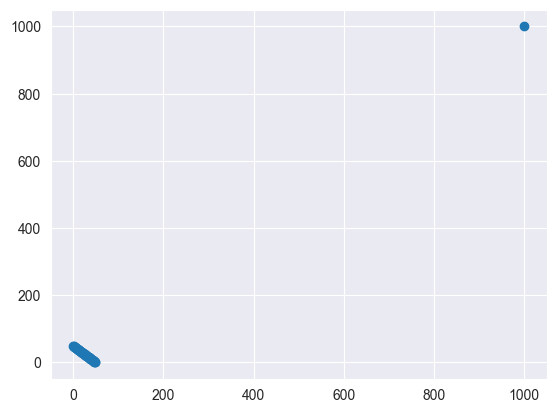

In [123]:
print(pd.DataFrame({'X': X,'Y':Y}).astype(int))
plt.scatter(X, Y)


In [124]:
pearson > spearman + 1.2

True

#section B:

In [125]:
#for kendall spearman qu|estion:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, kendalltau

x = np.linspace(0, 10, 50)
y = x + np.random.normal(0, 1, size=len(x))
y_swapped = y.copy()

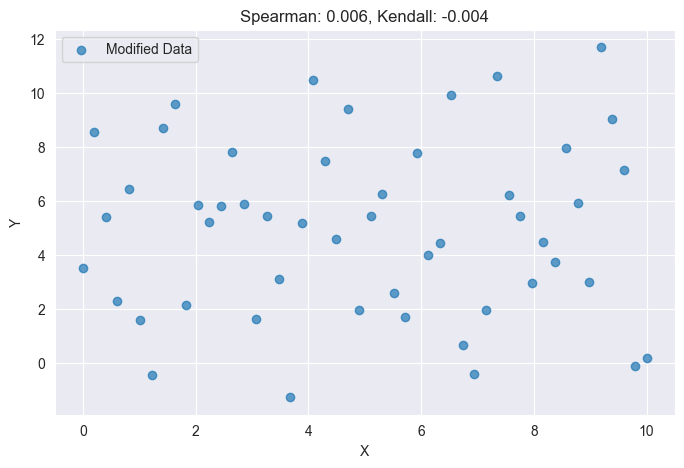

In [126]:

kendall_corr =0
spearman_corr=0

while not (kendall_corr < 0 and spearman_corr > 0):
    swap_indices = np.random.choice(len(y), size=30, replace=False)  # Select some indices to swap
    np.random.shuffle(swap_indices)  # Random shuffle to break concordance
    y_swapped[swap_indices] = np.random.permutation(y_swapped[swap_indices])  # Locally shuffle values

    spearman_corr, _ = spearmanr(x, y_swapped)
    kendall_corr, _ = kendalltau(x, y_swapped)

plt.figure(figsize=(8, 5))
plt.scatter(x, y_swapped, label="Modified Data", alpha=0.7)
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Spearman: {spearman_corr:.3f}, Kendall: {kendall_corr:.3f}")
plt.legend()
plt.show()


In [127]:
df_s_k = pd.DataFrame({'X': x, 'Y': y_swapped})
df_s_k.head(20)

,X,Y
0,0.000000,3.502924
1,0.204082,8.546678
2,0.408163,5.391387
3,0.612245,2.269007
4,0.816327,6.448723
5,1.020408,1.587364
6,1.224490,-0.460724
7,1.428571,8.701228
8,1.632653,9.578671
9,1.836735,2.126562


In [128]:
spearmanr(x, y_swapped).statistic

0.006002400960384154

In [129]:
kendalltau(X,Y).statistic

-0.9215686274509804

5) Can you find 2 pairs of genes that fulfill the
conditions in section 4.a and 4.b?

<span style="color:blue;"> As it is impossible to computer over all 54K genes' pairs, we looked to such pirs only on the D subset of genes which contains the 120 most DE genes. <span/>

In [130]:
import itertools
find = False
for col1, col2 in itertools.combinations(D, 2):
    if spearmanr(data[col1],data[col2]).statistic > spearmanr(data[col1],data[col2]).statistic +1.2:
        print('first cond')
        if spearmanr(data[col1],data[col2]).statistic * kendalltau(data[col1],data[col2]).statistic < 0:
            find = True
            print(f"True: {col1} , {col2}")
if not find:
    print('No such pair of genes found')

No such pair of genes found


e. Plots and Conclusions of the DE and correlation analysis
1) Construct the DE overabundance plots (blue and green
lines as shown in class) for M vs H overexpression (higher
expression levels in M) using WRS and t-test using the
results you had computed in Section 3c.
State, for each comparison, the number of genes, k, at
which we observe:
a) FDR = 0.1
b) FDR = 0.05
c) FDR = 0.001
If these events are not observed at any k, then make that
statement.


In [131]:
pvals_t_test = gene_pvals_table['p_val_t_test_m_greater_h'].values

pvals_WRS = gene_pvals_table['p_value_wrs_M_g_H'].values

In [132]:
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests

_, pvals_t_test_adj, _, _ = multipletests(pvals_t_test, alpha=0.05, method='fdr_bh')
_, pvals_WRS_adj, _, _ = multipletests(pvals_WRS, alpha=0.05, method='fdr_bh')

gene_pvals_table['adjusted_pval_t_test_m_greater_h'] = pvals_t_test_adj
gene_pvals_table['adjusted_p_value_wrs_M_g_H'] = pvals_WRS_adj

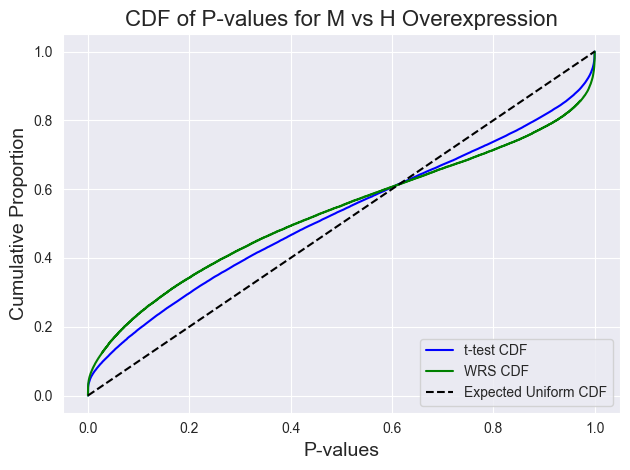

In [133]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pvals_t_test = gene_pvals_table['p_val_t_test_m_greater_h'].values
pvals_WRS = gene_pvals_table['p_value_wrs_M_g_H'].values

sorted_pvals_t_test = np.sort(pvals_t_test)
sorted_pvals_WRS = np.sort(pvals_WRS)

cdf_t_test = np.arange(1, len(sorted_pvals_t_test) + 1) / len(sorted_pvals_t_test)
cdf_WRS = np.arange(1, len(sorted_pvals_WRS) + 1) / len(sorted_pvals_WRS)

plt.plot(sorted_pvals_t_test, cdf_t_test, label="t-test CDF", color='blue')
plt.plot(sorted_pvals_WRS, cdf_WRS, label="WRS CDF", color='green')
plt.plot([0, 1], [0, 1], label="Expected Uniform CDF", linestyle='--', color='black')

plt.title("CDF of P-values for M vs H Overexpression", fontsize=16)
plt.xlabel("P-values", fontsize=14)
plt.ylabel("Cumulative Proportion", fontsize=14)
plt.legend(loc="lower right")

plt.grid(True)
plt.tight_layout()
plt.show()


In [134]:
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests


pvals_t_test = gene_pvals_table['p_val_t_test_m_greater_h'].values
pvals_WRS = gene_pvals_table['p_value_wrs_M_g_H'].values

_, pvals_t_test_adj, _, _ = multipletests(pvals_t_test, alpha=0.05, method='fdr_bh')
_, pvals_WRS_adj, _, _ = multipletests(pvals_WRS, alpha=0.05, method='fdr_bh')

gene_pvals_table['adjusted_pval_t_test_m_greater_h'] = pvals_t_test_adj
gene_pvals_table['adjusted_p_value_wrs_M_g_H'] = pvals_WRS_adj

def count_genes_at_FDR_thresholds(pvals_adj):
    thresholds = [0.1, 0.05, 0.001]
    counts = {f'FDR <= {thresh}': sum(pvals_adj <= thresh) for thresh in thresholds}
    return counts

t_test_counts = count_genes_at_FDR_thresholds(gene_pvals_table['adjusted_pval_t_test_m_greater_h'])
wrs_counts = count_genes_at_FDR_thresholds(gene_pvals_table['adjusted_p_value_wrs_M_g_H'])


print("For t-test (M vs H overexpression):")
for threshold, count in t_test_counts.items():
    print(f"{threshold}: {count} genes")

print("\nFor WRS (M vs H overexpression):")
for threshold, count in wrs_counts.items():
    print(f"{threshold}: {count} genes")


For t-test (M vs H overexpression):
FDR <= 0.1: 2775 genes
FDR <= 0.05: 2104 genes
FDR <= 0.001: 767 genes

For WRS (M vs H overexpression):
FDR <= 0.1: 3876 genes
FDR <= 0.05: 2808 genes
FDR <= 0.001: 903 genes


2) What can you say about the difference in results obtained
in WRS vs those obtained by Student t-test?


<span style="color:blue;">WRS detects more genes as differentially expressed than the t-test at all thresholds. This suggests that WRS is more sensitive in this dataset.
If the gene expression data is not normally distributed, the t-test might fail to detect some differences,
leading to fewer significant genes compared to WRS.

If there are outliers in the expression data,
the t-test might miss some differentially expressed genes, whereas WRS remains robust and detects more.
<span/>

3) Select any 3 differentially expressed genes, from D (which
was defined in 3d), and produce a graphical representation
of their expression patterns that demonstrates the observed
DE.


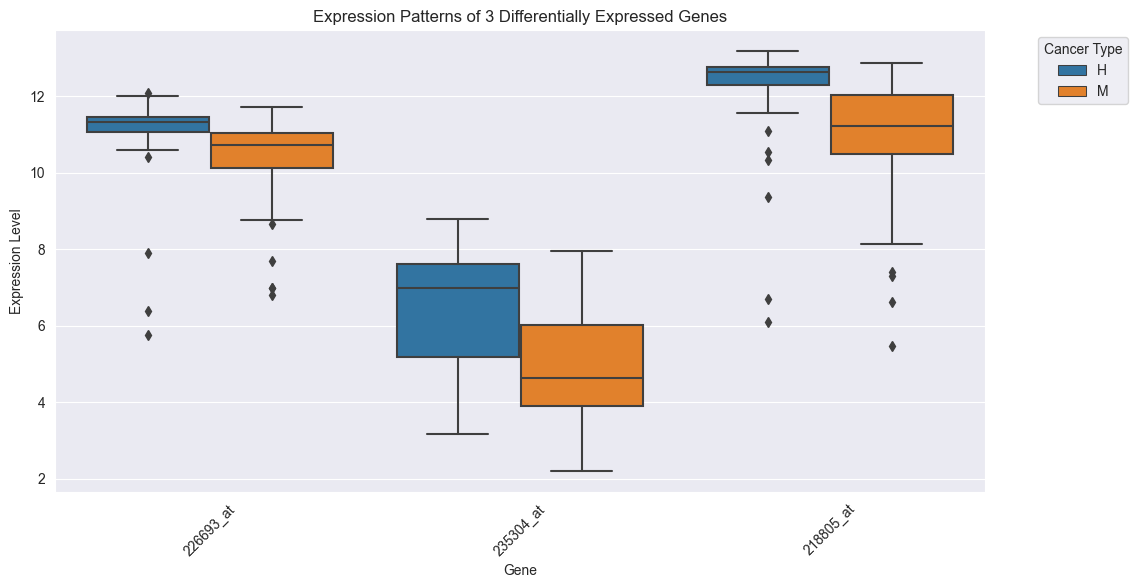

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Select three differentially expressed genes from D
# raw_data = pd.read_csv("AMI_GSE66360_series_matrix.csv", encoding='ISO-8859-1')
# raw_data.dropna(inplace=True, axis=1)
# raw_data.iloc[:, 2:] = raw_data.iloc[:, 2:].astype(float)

selected_genes = D.sample(3, random_state=42).values  # Randomly pick 3 genes
colnamestoextract = ['Class'] + list(selected_genes)
# Filter the raw_data for selected genes and include the type column
# df_selected = raw_data['type','226693_at','235304_at', '218805_at']  # Keep cancer type column
df_selected = data[colnamestoextract]
# Reshape the data for seaborn plotting
df_melted = df_selected.melt(id_vars='Class', var_name='Gene', value_name='Expression')

# Create a boxplot (or use sns.violinplot for violin representation)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x='Gene', y='Expression', hue='Class')

# Customize the plot
plt.title("Expression Patterns of 3 Differentially Expressed Genes")
plt.xlabel("Gene")
plt.ylabel("Expression Level")
plt.xticks(rotation=45)
plt.legend(title="Cancer Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


4) Heatmap
Draw a heatmap representation of the expression values of
the genes in D (from 3d), across the entire cohort (all
samples). Order the genes and the samples to produce the
maximal visual effect.


C:\Users\itani\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:1113: UserWarning: Glyph 9 (	) missing from current font.
  self._figure.tight_layout(**tight_params)
C:\Users\itani\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


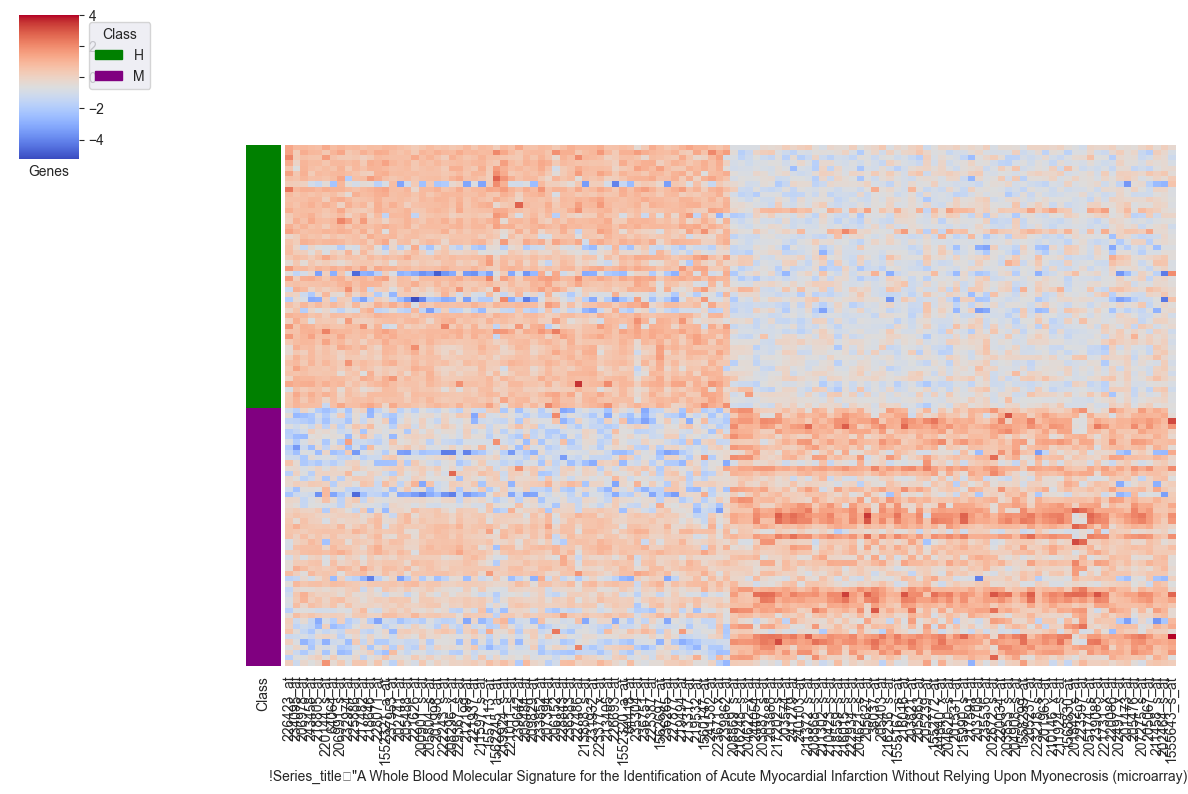

In [136]:
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Assuming 'data' is the original DataFrame with the gene expression data
# 'D' contains the selected genes (differentially expressed)

# Extract the gene expression values for genes in D

D_gene_values = data.loc[:, D].astype(float)

# Standardize the gene expression data (Z-score normalization)
D_gene_values_standardized = D_gene_values.apply(zscore)

# Assuming 'Class' column contains the cancer subtype information for coloring
sample_types = data['Class']
sorted_indices = sample_types.argsort()  # Sort samples to group them by class
sample_types = sample_types.iloc[sorted_indices]  # Reorder types
D_gene_values_standardized = D_gene_values_standardized.iloc[sorted_indices]  # Reorder gene data accordingly

# Define custom colors for each group (you can adjust this based on your classes)
color_map = {
    'H': 'green',
    'M': 'purple'
}
row_colors = sample_types.map(color_map)  # Assign custom colors

# Create Heatmap (without clustering of columns, only by class)
sns.clustermap(D_gene_values_standardized, 
               cmap="coolwarm",  # Red-blue color scale
               figsize=(12, 8),  # Adjust figure size
               row_colors=row_colors,  # Add subtype color labels
               yticklabels=False,  # Hide sample labels if too many
               xticklabels=True,  # Keep gene labels visible
               col_cluster=False,
               row_cluster = False,  # Disable clustering of columns
               standard_scale=None)  # Already standardized data
plt.xlabel('Genes')  # Set x-axis label

# Add a Legend for Cancer Subtypes
from matplotlib.patches import Patch
legend_patches = [Patch(color=color, label=type_name) for type_name, color in color_map.items()]
plt.legend(handles=legend_patches, title="Class", bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.show()


f. ML classifiers
1) Split the dataset into a 80/20 train/test random split.


In [137]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,2:]  # Feature(s)
y = data['Class']    # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2) Select the 6 most significant DE genes from the training
set according to WRS – best 3 overexpressed and best 3
underexpressed genes.


In [138]:
genes_underexpressed_top_3 = genes_underexpressed_top_60.iloc[:3]
genes_overexpressed_top_3 = genes_overexpressed_top_60.iloc[:3]


3) Perform Naïve Bayes classification to predict the classes
M and H and report your results. Use the sklearn library.


In [139]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.70
Confusion Matrix:
[[8 3]
 [3 6]]
Classification Report:
              precision    recall  f1-score   support

           H       0.73      0.73      0.73        11
           M       0.67      0.67      0.67         9

    accuracy                           0.70        20
   macro avg       0.70      0.70      0.70        20
weighted avg       0.70      0.70      0.70        20



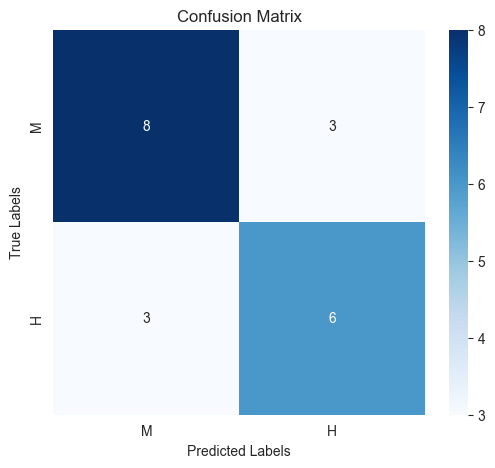

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['M', 'H'], yticklabels=['M', 'H'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

4) Build a Decision Tree to predict the the classes M and H
and report your results. Use the sklearn library. What
would you expect to get had you used all 50K features?


5) Compare the results of the two classifiers.

In [141]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.80
Confusion Matrix:
[[8 3]
 [1 8]]
Classification Report:
              precision    recall  f1-score   support

           H       0.89      0.73      0.80        11
           M       0.73      0.89      0.80         9

    accuracy                           0.80        20
   macro avg       0.81      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20



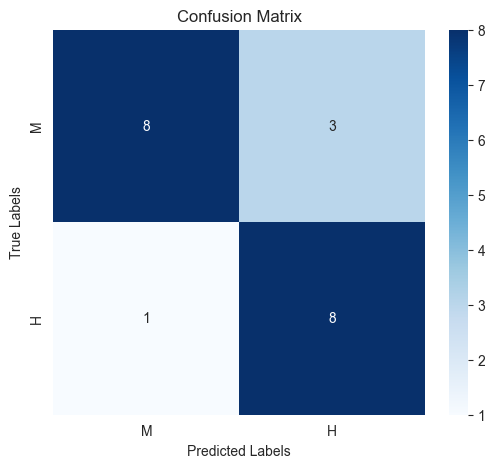

In [142]:

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['M', 'H'], yticklabels=['M', 'H'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()